In [1]:
import sys
sys.path.append('../src/')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from model import sequential
from solver import LstmSolver
from predictor import DeterministicAutoregressivePredictor
from utils import data_util
import numpy as np

D:\Tools\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
piece_length = 5

In [36]:
model = sequential.SequentialModel()
data = np.load('../data/BABA-alldays.npy')[:,1]
[train_X, train_Y, valid_X, valid_Y, test_X, test_Y] = data_util.SerieToPieces(data = data, piece_length = piece_length, shuffle = True, test_ratio = 0.1, valid_ratio = 0.0)

In [40]:
test_X.shape

(49, 5, 1)

In [41]:
params = {'input_length' : train_X.shape[1],
          'input_size'   : train_X.shape[2]}
solver = LstmSolver.LstmSolver(params)

In [42]:
solver.fit(train_X, train_Y, batch_size = 128, epochs = 100)

Train on 435 samples, validate on 5 samples
Epoch 1/100
435/435 [==============================] - 4s 8ms/step - loss: 10088.2949 - val_loss: 6669.0400
Epoch 2/100
435/435 [==============================] - 0s 360us/step - loss: 8989.3679 - val_loss: 5387.1973
Epoch 3/100
435/435 [==============================] - 0s 326us/step - loss: 7678.0342 - val_loss: 4720.7422
Epoch 4/100
435/435 [==============================] - 0s 316us/step - loss: 6991.2500 - val_loss: 4286.0654
Epoch 5/100
435/435 [==============================] - 0s 335us/step - loss: 6494.5466 - val_loss: 3932.6965
Epoch 6/100
435/435 [==============================] - 0s 321us/step - loss: 6090.7690 - val_loss: 3644.9766
Epoch 7/100
435/435 [==============================] - 0s 307us/step - loss: 5743.2245 - val_loss: 3378.1052
Epoch 8/100
435/435 [==============================] - 0s 307us/step - loss: 5417.9384 - val_loss: 3124.2961
Epoch 9/100
435/435 [==============================] - 0s 319us/step - loss: 5103.605

435/435 [==============================] - 0s 362us/step - loss: 238.1704 - val_loss: 116.7517
Epoch 77/100
435/435 [==============================] - 0s 314us/step - loss: 247.5772 - val_loss: 240.2382
Epoch 78/100
435/435 [==============================] - 0s 342us/step - loss: 260.6955 - val_loss: 139.0121
Epoch 79/100
435/435 [==============================] - 0s 310us/step - loss: 225.3415 - val_loss: 289.9700
Epoch 80/100
435/435 [==============================] - 0s 298us/step - loss: 279.1543 - val_loss: 91.7436
Epoch 81/100
435/435 [==============================] - 0s 307us/step - loss: 195.4867 - val_loss: 163.3835
Epoch 82/100
435/435 [==============================] - 0s 321us/step - loss: 292.1778 - val_loss: 146.7015
Epoch 83/100
435/435 [==============================] - 0s 323us/step - loss: 195.5046 - val_loss: 126.0390
Epoch 84/100
435/435 [==============================] - 0s 293us/step - loss: 237.1541 - val_loss: 185.0370
Epoch 85/100
435/435 [====================

In [43]:
predictor = DeterministicAutoregressivePredictor.DeterministicAutoregressivePredictor(solver = solver)

In [44]:
predictions = predictor.multistep_predict(test_X[0:1,:,:], 500)

progress: 1 / 500
progress: 2 / 500
progress: 3 / 500
progress: 4 / 500
progress: 5 / 500
progress: 6 / 500
progress: 7 / 500
progress: 8 / 500
progress: 9 / 500
progress: 10 / 500
progress: 11 / 500
progress: 12 / 500
progress: 13 / 500
progress: 14 / 500
progress: 15 / 500
progress: 16 / 500
progress: 17 / 500
progress: 18 / 500
progress: 19 / 500
progress: 20 / 500
progress: 21 / 500
progress: 22 / 500
progress: 23 / 500
progress: 24 / 500
progress: 25 / 500
progress: 26 / 500
progress: 27 / 500
progress: 28 / 500
progress: 29 / 500
progress: 30 / 500
progress: 31 / 500
progress: 32 / 500
progress: 33 / 500
progress: 34 / 500
progress: 35 / 500
progress: 36 / 500
progress: 37 / 500
progress: 38 / 500
progress: 39 / 500
progress: 40 / 500
progress: 41 / 500
progress: 42 / 500
progress: 43 / 500
progress: 44 / 500
progress: 45 / 500
progress: 46 / 500
progress: 47 / 500
progress: 48 / 500
progress: 49 / 500
progress: 50 / 500
progress: 51 / 500
progress: 52 / 500
progress: 53 / 500
pr

progress: 418 / 500
progress: 419 / 500
progress: 420 / 500
progress: 421 / 500
progress: 422 / 500
progress: 423 / 500
progress: 424 / 500
progress: 425 / 500
progress: 426 / 500
progress: 427 / 500
progress: 428 / 500
progress: 429 / 500
progress: 430 / 500
progress: 431 / 500
progress: 432 / 500
progress: 433 / 500
progress: 434 / 500
progress: 435 / 500
progress: 436 / 500
progress: 437 / 500
progress: 438 / 500
progress: 439 / 500
progress: 440 / 500
progress: 441 / 500
progress: 442 / 500
progress: 443 / 500
progress: 444 / 500
progress: 445 / 500
progress: 446 / 500
progress: 447 / 500
progress: 448 / 500
progress: 449 / 500
progress: 450 / 500
progress: 451 / 500
progress: 452 / 500
progress: 453 / 500
progress: 454 / 500
progress: 455 / 500
progress: 456 / 500
progress: 457 / 500
progress: 458 / 500
progress: 459 / 500
progress: 460 / 500
progress: 461 / 500
progress: 462 / 500
progress: 463 / 500
progress: 464 / 500
progress: 465 / 500
progress: 466 / 500
progress: 467 / 500


In [14]:
import matplotlib.pyplot as plt

In [ ]:
predictions.shape

In [ ]:
test_X[0:2,:,0]

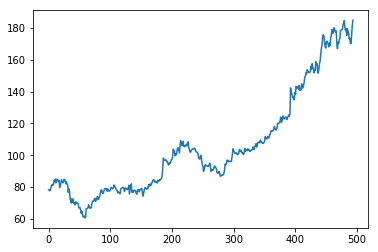

In [49]:
plt.plot(data)
plt.show()

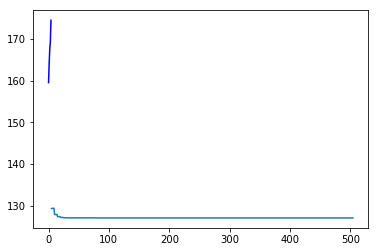

In [50]:
plt.plot(range(0, piece_length), test_X[0,:,0], 'b-')
plt.plot(range(piece_length,piece_length+predictions.shape[1]), predictions[0,:])
plt.show()

In [28]:
print(test_X[0,:,0])

[-0.14557459 -0.24361724 -0.33922575 -0.43144483 -0.51935306 -0.60207208
 -0.67877539 -0.74869661 -0.81113709 -0.86547296 -0.91116132 -0.94774565
 -0.97486042 -0.9922347  -0.99969491 -0.99716649 -0.98467472 -0.9623444
 -0.93039865 -0.88915667 -0.83903053 -0.78052107 -0.71421291 -0.64076856
 -0.56092187 -0.47547063 -0.38526865 -0.29121719 -0.19425598 -0.09535383
  0.00450106  0.10431098  0.20307865  0.29981724  0.39356015  0.48337073
  0.56835164  0.64765376  0.72048474  0.78611688  0.84389439  0.89323999
  0.93366064  0.96475245  0.98620478  0.99780327  0.99943205  0.99107483
  0.97281512  0.94483536]


In [29]:
predictor.do_predict(test_X[:1, :, :])

array([0.76656014], dtype=float32)